# **CNN Dropout**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.4.1


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
# reshape images to specify that it's a single channel
print(test_labels.shape)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step
(10000,)


In [ ]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

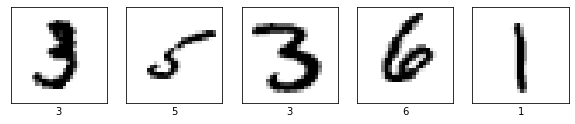

In [ ]:
plt.figure(figsize=(10,2))
for i in range(10,15):
    plt.subplot(1,5,i-9)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

2. Annotate the sizes of the mathematical objects within; inputs, outputs, filters, etc.  

The input to the neural network are 28 X 28 images- the train set has 60000 images and test set has 10000 images.

The output vector is a 10 element one hot vector that maps the output to numbers ranging from 0-9

The model-

> 1 layer- 32 convolution filters of size 3 x 3

>2 layer- 64 convolution filters of size 3 x 3 x 32

>3 layer- max-pool filter of size 2 x 2

>4 layer- fully conected layer with 128 neurons connnected with max pool layer

>Output layer- 10 neurons fully connected with layer 4


The ouputs of each layer and the weights of fully connected layers-

>1 layer-26 x 26 x 32

>2 layer- 24 x 24 x 64

>3 layer- 23 x 23 x 64

>4 layer- 128 outputs from 33,856 inputs- which gives us 4,333,568 weights and 128 biases

>Output layer- 10 outputs from 128 inputs- which gives us 1,280 weights and 10 biases



In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

3. How is dropout applied?

Dropout is applied to the previous layer where the arrgument represents the chance with which a neurons activation will be 0.

eg- 0.5 means that there is a 50% chance of dropout for each neuron in the layer before 

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.3605 - accuracy: 0.8879
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0787 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0587 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0415 - accuracy: 0.9864


In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 20ms/step - loss: 0.0308 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


4. What is the performance with Dropout enabled?

There is very high accurancy for both the training set and the test set while using drop out. The varience between both the training accuracy and the test accuracy is also quite low

# Removing Dropout

In [ ]:
model2 = keras.Sequential()
# 32 convolution filters used each of size 3x3
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model2.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model2.add(MaxPooling2D(pool_size=(2, 2)))
# flatten since too many dimensions, we only want a classification output
model2.add(Flatten())
# fully connected to get all relevant data
model2.add(Dense(128, activation='relu'))
# output a softmax to squash the matrix into output probabilities
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.2481 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 5/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0111 - accuracy: 0.9962


In [ ]:
print(test_images.shape)
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 20ms/step - loss: 0.0421 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


5. Now disable it. What is the performance?

Disabling dropout we can notice the accuracy of the training set increased but there is a slighty larger gap in accuracy between the training set and the test set. This may imply a case of slight overfitting to the Training set.

# Increasing the probability of Dropout

In [ ]:
model3 = keras.Sequential()
# 32 convolution filters used each of size 3x3
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model3.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model3.add(Dropout(0.5))
# flatten since too many dimensions, we only want a classification output
model3.add(Flatten())
# fully connected to get all relevant data
model3.add(Dense(128, activation='relu'))
# one more dropout
model3.add(Dropout(0.7))
# output a softmax to squash the matrix into output probabilities
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model3.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 151s 80ms/step - loss: 0.5483 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1664 - accuracy: 0.9509
Epoch 3/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1287 - accuracy: 0.9623
Epoch 4/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.1028 - accuracy: 0.9681
Epoch 5/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0955 - accuracy: 0.9712


In [ ]:
print(test_images.shape)
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 20ms/step - loss: 0.0294 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


# Using a lower probability of Dropout

In [ ]:
model4 = keras.Sequential()
# 32 convolution filters used each of size 3x3
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model4.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model4.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model4.add(Dropout(0.1))
# flatten since too many dimensions, we only want a classification output
model4.add(Flatten())
# fully connected to get all relevant data
model4.add(Dense(128, activation='relu'))
# one more dropout
model4.add(Dropout(0.1))
# output a softmax to squash the matrix into output probabilities
model4.add(Dense(10, activation='softmax'))

In [ ]:
model4.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model4.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 2/5
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 3/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 4/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 5/5
1875/1875 [==============================] - 153s 81ms/step - loss: 0.0077 - accuracy: 0.9973


In [ ]:
print(test_images.shape)
test_loss, test_acc = model4.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 20ms/step - loss: 0.0452 - accuracy: 0.9917
Test accuracy: 0.9916999936103821


6 and 7

Altering the dropout in model 3 we can see that increasing drop out to a higher extent- Lowers the DOF of the model drastically while training as most of the neurons get turned off and the much of the useful data is lost. This leads to a lower accuracy in both the training and test set. We can also see a larger gap between the accuracy of the test and training set.

Altering the dropout in model 4 we can see that decreasing the dropout closer to 0 brings us closer to a model that doesnt have drop out but also gives us the benfits of generalization of dropout. The accuracy of the training set is close to the model with no dropout. The gap in the accuracy of the test set and the train set is also quite low; it is comparable to the first model.

We can see that there is no definate value of dropot that will give us the best model for our problem. This is why this is a hyperparameter of the model and has to be empirically choosen by us.

